In [1]:
!pip install kafka-python==2.0.2
!pip install matplotlib
!pip install cmcrameri

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.4/277.4 kB 2.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import os
import pandas as pd

In [3]:
!curl -sSOL https://downloads.apache.org/kafka/3.6.1/kafka_2.12-3.6.1.tgz

In [4]:
!tar -xzf kafka_2.12-3.6.1.tgz

In [5]:
!./kafka_2.12-3.6.1/bin/zookeeper-server-start.sh -daemon ./kafka_2.12-3.6.1/config/zookeeper.properties
!./kafka_2.12-3.6.1/bin/kafka-server-start.sh -daemon ./kafka_2.12-3.6.1/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


In [6]:
!ps -ef | grep kafka

root        1456     218  0 04:41 ?        00:00:00 /bin/bash -c ps -ef | grep kafka
root        1458    1456  0 04:41 ?        00:00:00 grep kafka


### Creación de 16 tópicos
Cada tópico corresponde a 1 canal, el archivo hltau_completo_uv.csv contiene 16 canales.

In [7]:
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c0
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c1
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c2
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c3
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c4
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c5
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c6
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c7
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c8
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c9
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c10
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c11
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c12
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c13
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c14
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c15

Created topic c0.
Created topic c1.
Created topic c2.
Created topic c3.
Created topic c4.
Created topic c5.
Created topic c6.
Created topic c7.
Created topic c8.
Created topic c9.
Created topic c10.
Created topic c11.
Created topic c12.
Created topic c13.
Created topic c14.
Created topic c15.


In [8]:
'''
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c0
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c1
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c2
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c3
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c4
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c5
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c6
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c7
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c8
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c9
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c10
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c11
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c12
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c13
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c14
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c15
'''

'\n!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c0\n!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c1\n!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c2\n!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c3\n!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c4\n!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c5\n!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c6\n!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c7\n!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c8\n!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delete --bootstrap-server 127.0.0.1:9092 --topic c9\n!./kafka_2.12-3.6.1/bin/kafka-topics.sh --delet

In [9]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
vis_df = pd.read_csv('drive/MyDrive/hltau_completo_uv.csv')
vis_df = vis_df.drop(vis_df.columns[2], axis=1) # Drop w column
vis_df.tail()

,-2245.512935,-625.275579,0.019848,-0.009888,12065070.000000,224749993984.000000,0
3196370,-49.627602,28.421167,0.811038,0.068833,11467541.0,2.417500e+11,13
3196371,-49.627602,28.421167,0.764876,0.124828,11166644.0,2.422500e+11,14
3196372,-49.627602,28.421167,0.784313,0.060222,11467541.0,2.422500e+11,14
3196373,-49.627602,28.421167,0.767079,0.140298,11166644.0,2.427500e+11,15
3196374,-49.627602,28.421167,0.808210,0.059672,11467541.0,2.427500e+11,15


### Creación del Productor
Se crea la función *write_to_kafka* para enviar las visibilidades a cada tópico que le corresponda dependiendo de su canal espectral.

In [11]:
from kafka import KafkaProducer
producer = KafkaProducer(bootstrap_servers=['127.0.0.1:9092'])
def error_callback(exc):
    raise Exception('Error while sendig data to kafka: {0}'.format(str(exc)))

def write_to_kafka(df):
  cont = 0
  for index, row in df.iterrows():
    if cont % 100000 == 0:
      print(cont)
    c = row.iloc[-1]
    topic = f"c{int(c)}"
    value = ';'.join(map(str, row.iloc[:-1])).encode('utf-8')
    producer.send(topic, value).add_errback(error_callback)
    cont+=1

In [12]:
write_to_kafka(vis_df)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000


In [13]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar -xvf spark-3.5.0-bin-hadoop3.tgz
!pip install findspark

--2023-12-20 05:00:24--  https://downloads.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f8:10a:201a::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400395283 (382M) [application/x-gzip]
Saving to: ‘spark-3.5.0-bin-hadoop3.tgz’

spark-3.5.0-bin-had 100%[===================>] 381.85M   110MB/s    in 3.5s    

2023-12-20 05:00:28 (108 MB/s) - ‘spark-3.5.0-bin-hadoop3.tgz’ saved [400395283/400395283]

spark-3.5.0-bin-hadoop3/
spark-3.5.0-bin-hadoop3/kubernetes/
spark-3.5.0-bin-hadoop3/kubernetes/tests/
spark-3.5.0-bin-hadoop3/kubernetes/tests/pyfiles.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/decommissioning.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/autoscale.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/python_executable_check.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/worker_mem

In [14]:
!curl -fL https://github.com/coursier/coursier/releases/latest/download/cs-x86_64-pc-linux.gz | gzip -d > cs && chmod +x cs && ./cs setup -y

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 19.8M  100 19.8M    0     0  10.7M      0  0:00:01  0:00:01 --:--:-- 26.3M
Checking if a JVM is installed
Found a JVM installed under /usr/lib/jvm/java-11-openjdk-amd64.

Checking if ~/.local/share/coursier/bin is in PATH
Should we add ~/.local/share/coursier/bin to your PATH via ~/.profile? [Y/n] Y

Checking if the standard Scala applications are installed
 [#         ]   Downloaded 1 XML files
 [#         ]   Downloaded 1 XML files
 [#         ]   Downloaded 1 POM files
 [#         ]   Downloaded 1 POM files
 [#         ]   Downloaded 1 POM files
 [#         ]   Downloaded 3 POM files
 [ #        ]   Downloaded 6 POM files
 [ #        ]   Downloaded 7 POM files
 [  #   

In [15]:
os.environ['PATH'] += ":/root/.local/share/coursier/bin"

In [16]:
!cs install scala:2.12.18 && cs install scalac:2.12.18

https://repo1.maven.org/maven2/org/scala-lang/scala-compiler/2.12.18/scala-comp…
  100.0% [##########] 2.4 KiB (89.4 KiB / s)
https://repo1.maven.org/maven2/org/scala-lang/scala-library/2.12.18/scala-libra…
    0.0% [          ] 0B (0B / s)
https://repo1.maven.org/maven2/org/scala-lang/scala-reflect/2.12.18/scala-refle…
    0.0% [          ] 0B (0B / s)
https://repo1.maven.org/maven2/org/scala-lang/modules/scala-xml_2.12/2.1.0/scal…
    0.0% [          ] 0B (0B / s)
https://repo1.maven.org/maven2/org/scala-lang/scala-library/2.12.18/scala-libra…
    0.0% [          ] 0B (0B / s)
https://repo1.maven.org/maven2/org/scala-lang/scala-reflect/2.12.18/scala-refle…
    0.0% [          ] 0B (0B / s)
https://repo1.maven.org/maven2/org/scala-lang/modules/scala-xml_2.12/2.1.0/scal…
    0.0% [          ] 0B (0B / s)
https://repo1.maven.org/maven2/org/scala-lang/modules/scala-xml_2.12/2.1.0/scal…
  100.0% [##########] 2.6 KiB (46.7 KiB / s)
https://repo1.maven.org/maven2/org/scala-lang/scala-reflec

In [17]:
!wget "https://repo1.maven.org/maven2/org/apache/spark/spark-streaming-kafka-0-10-assembly_2.12/3.5.0/spark-streaming-kafka-0-10-assembly_2.12-3.5.0.jar"

--2023-12-20 05:01:24--  https://repo1.maven.org/maven2/org/apache/spark/spark-streaming-kafka-0-10-assembly_2.12/3.5.0/spark-streaming-kafka-0-10-assembly_2.12-3.5.0.jar
Resolving repo1.maven.org (repo1.maven.org)... 199.232.192.209, 199.232.196.209, 2a04:4e42:4c::209, ...
Connecting to repo1.maven.org (repo1.maven.org)|199.232.192.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5284417 (5.0M) [application/java-archive]
Saving to: ‘spark-streaming-kafka-0-10-assembly_2.12-3.5.0.jar’

spark-streaming-kaf 100%[===================>]   5.04M  --.-KB/s    in 0.04s   

2023-12-20 05:01:24 (121 MB/s) - ‘spark-streaming-kafka-0-10-assembly_2.12-3.5.0.jar’ saved [5284417/5284417]



In [18]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars /content/spark-streaming-kafka-0-10-assembly_2.12-3.5.0.jar pyspark-shell'

In [19]:
import findspark
findspark.init()
import pyspark
from pyspark.ml.feature import Normalizer, StandardScaler
from pyspark.streaming import StreamingContext
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from uuid import uuid1
import time
import random
import numpy as np
import sys

In [20]:
scala_version = '2.12'
spark_version = '3.5.0'
# TODO: Ensure match above values match the correct versions
packages = [
    f'org.apache.spark:spark-sql-kafka-0-10_{scala_version}:{spark_version}',
    'org.apache.kafka:kafka-clients:3.6.1'
]
spark = SparkSession.builder\
   .master("local")\
   .appName("kafka-example")\
   .config("spark.jars.packages", ",".join(packages))\
   .getOrCreate()
spark.sparkContext.setLogLevel("WARN")

In [21]:
def readFromKafka(spark, topics):
  return spark.readStream \
  .format("kafka") \
  .option("kafka.bootstrap.servers", "localhost:9092") \
  .option("subscribe", topics) \
  .option("startingOffsets", "earliest") \
  .option("failOnDataLoss", False) \
  .load()

### Lectura del Productor, Suscripción a los tópicos
Se lee de los 16 tópicos producidos por Kafka.

In [22]:
query_df = readFromKafka(spark, "c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15")
query_df.printSchema()

root
 |-- key: binary (nullable = true)
 |-- value: binary (nullable = true)
 |-- topic: string (nullable = true)
 |-- partition: integer (nullable = true)
 |-- offset: long (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- timestampType: integer (nullable = true)



In [23]:
qq = spark.read \
  .format("kafka") \
  .option("kafka.bootstrap.servers", "localhost:9092") \
  .option("subscribe", "c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15") \
  .option("startingOffsets", "earliest") \
  .option("failOnDataLoss", False) \
  .load()

In [24]:
ql = spark.readStream \
  .format("kafka") \
  .option("kafka.bootstrap.servers", "localhost:9092") \
  .option("subscribe", "c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15") \
  .option("startingOffsets", "earliest") \
  .option("failOnDataLoss", False) \
  .load()

### Procesamiento

#### 1. Gridding
Una vez leído los datos del productor se utiliza sentencias SQL para crear nuevas columnas "ik", "jk" y la última que corrresponde a la casilla que corresponde la visibilidad en un arreglo N * N indexado dado por:

```
grid = ik * N + jk
```

Luego cada fila del dataframe tendrá 4 atributos/columnas, correspondiente a cada visibilidad *(con valores de ejemplo)*.

| grid | sum_r | sum_i | sum_w |
| --- | --- | --- | --- |
| 2175953 | 9.671548E-4 | 9.671548E-4 |9.671548E-4

Se declaran los datos del problema como la velocidad de la luz, deltaX, el largo y ancho de la imagen, y se calcula deltaU | deltaV.

In [26]:
LIGHT_SPEED = 299792458
N = 2048
dim = N * N
deltaX = 0.003

def arcsec_to_rad(degree): return degree * np.pi / (180 * 3600)

deltaU = 1 / (N * arcsec_to_rad(deltaX));
deltaV = deltaU;

In [27]:
query2 = qq.selectExpr(
    "FLOAT(SPLIT_PART(value, ';', 1)) AS u",
    "FLOAT(SPLIT_PART(value, ';', 2)) AS v",
    "FLOAT(SPLIT_PART(value, ';', 3)) AS vr",
    "FLOAT(SPLIT_PART(value, ';', 4)) AS vi",
    "FLOAT(SPLIT_PART(value, ';', 5)) AS w",
    "FLOAT(SPLIT_PART(value, ';', 6)) AS fq",
    f"ROUND(u * (fq / {LIGHT_SPEED}) / {deltaU}) + ({N} / 2) AS ik",
    f"ROUND(v * (fq / {LIGHT_SPEED}) / {deltaV}) + ({N} / 2) AS jk",
    "(vr * w) AS rw",
    "(vi * w) AS iw",
    f"INT(ik * {N} + jk) AS grid",
    "current_timestamp() AS timestamp") \
    .withWatermark("timestamp", "0 minutes") \
    .groupBy("grid", "timestamp").agg(
    sum("rw").alias("real_sum"),
    sum("iw").alias("imag_sum"),
    sum("w").alias("weight_sum")
)

In [28]:
ql2 = ql.selectExpr(
    "FLOAT(SPLIT_PART(value, ';', 1)) AS u",
    "FLOAT(SPLIT_PART(value, ';', 2)) AS v",
    "FLOAT(SPLIT_PART(value, ';', 3)) AS vr",
    "FLOAT(SPLIT_PART(value, ';', 4)) AS vi",
    "FLOAT(SPLIT_PART(value, ';', 5)) AS w",
    "FLOAT(SPLIT_PART(value, ';', 6)) AS fq",
    f"ROUND(u * (fq / {LIGHT_SPEED}) / {deltaU}) + ({N} / 2) AS ik",
    f"ROUND(v * (fq / {LIGHT_SPEED}) / {deltaU}) + ({N} / 2) AS jk",
    "(vr * w) AS rw",
    "(vi * w) AS iw",
    f"INT(ik * {N} + jk) AS grid",
    "current_timestamp() AS timestamp") \
    .withWatermark("timestamp", "0 minutes") \
    .groupBy("grid", "timestamp").agg(
    sum("rw").alias("real_sum"),
    sum("iw").alias("imag_sum"),
    sum("w").alias("weight_sum")
)

In [29]:
display(query2.show())

+-------+--------------------+--------------------+--------------------+---------------+
|   grid|           timestamp|            real_sum|            imag_sum|     weight_sum|
+-------+--------------------+--------------------+--------------------+---------------+
|2235360|2023-12-20 05:03:...|  2822284.9226379395|  -5739838.736206055| 2.0641649785E9|
|2042878|2023-12-20 05:03:...| 1.938388788723755E8|-2.16258716829223...| 8.6232532025E9|
|2053136|2023-12-20 05:03:...|1.0497699990692139E7| 1.691921190548706E7| 5.3608261445E9|
|2020309|2023-12-20 05:03:...|  -6174929.889282227|-5.42778060568847...|  2.698504494E9|
|2276325|2023-12-20 05:03:...|-1.81628763657226...|  -4075107.614927292|  3.534558846E9|
|2270250|2023-12-20 05:03:...|   551654.6953735352| -1338140.4909667969|  3.086038173E9|
|2489286|2023-12-20 05:03:...|  1549461.9597167969| -3153045.8193359375|   5.31524195E8|
|2055161|2023-12-20 05:03:...|  -3524359.464111328|   -9321831.13206482|  2.038139303E9|
|1709041|2023-12-20 0

None

#### 2. Normalización
Luego de realizar el gridding se procede a normalizar de acuerdo al peso de cada visibilidad, obtiendo solamente 2 columnas correspondiente a la parte real e imaginaria *(con valores de ejemplo)*.

| grid | sum_r | sum_i |
| --- | --- | --- |
| 2175953 | 9.671548E-4 | 9.671548E-4

In [30]:
query3 = query2.selectExpr("grid","FLOAT(real_sum / weight_sum) AS real_sum", "FLOAT(imag_sum / weight_sum) AS imag_sum")

In [31]:
ql3 = ql2.selectExpr("grid","FLOAT(real_sum / weight_sum) AS real_sum", "FLOAT(imag_sum / weight_sum) AS imag_sum")

In [32]:
display(query3.show())

+-------+-------------+-------------+
|   grid|     real_sum|     imag_sum|
+-------+-------------+-------------+
|2126813|  0.014263847|-0.0141212735|
|1983520|-3.8607657E-4|  0.002999367|
|2218953|-0.0055363984|-0.0041894335|
|2036753| -0.016035981|-0.0129244365|
|2049042| -0.002731226|-0.0022372077|
|1928229|  5.722925E-4|-0.0017439221|
|2274349|  9.138835E-4|-0.0010870616|
|2092070|-0.0015179422|  0.020076135|
|2022452| 0.0011212801|-3.5906813E-4|
|2304953|  0.005866468| -0.004990246|
|2180023| 0.0053310837|  -0.00132538|
|2409432| 0.0036730233|-0.0024501004|
|2229200| 0.0012529821|-0.0021877629|
|1979464|  0.004491665| 0.0033106045|
|1917964|-0.0027257765| 0.0030107833|
|1881134|-0.0012205868|-0.0036258344|
|1950683| 7.0448907E-4| 3.5720173E-4|
|2155394| 0.0025811102|-7.1879005E-4|
|2057236|-0.0014571886| 9.6359354E-4|
|1731591|-0.0014564426|-0.0041142344|
+-------+-------------+-------------+
only showing top 20 rows



None

### DataFrame Visualization
Se realiza una query con **memory sink** para visualizar si el dataframe es correcto.

In [33]:
ql3.writeStream \
    .queryName("test_query") \
    .outputMode("append") \
    .format("memory") \
    .start()

In [34]:
display(spark.sql('SELECT * FROM test_query').show())

+----+--------+--------+
|grid|real_sum|imag_sum|
+----+--------+--------+
+----+--------+--------+



None

### File Sink
Se vacía el contenido del dataframe reducido en un .csv, dado por las 3 columnas casilla(grid), parte real(sum_r) y parte imaginaria (sum_i)

In [ ]:
ql3.writeStream\
   .format("csv")\
   .trigger(processingTime="10 seconds")\
   .option("checkpointLocation", "checkpoint/")\
   .option("path", "output_path/")\
   .outputMode("append")\
   .start()\
   .awaitTermination()

#### Merge de los .csv generados
Se junta todos los archivos .csv generados, al estar en un entorno distribuido. Y se genera un solo archivo en la carpeta ./complete_csv/

In [36]:
allfiles =  spark.read.option("header","false").csv("./output_path/part-*.csv")
allfiles.coalesce(1).write.format("csv").option("header", "false").save("./complete_csv/")

### Image Visualization

In [39]:
cs = pd.read_csv("./complete_csv/part-00000-1e83400b-8dff-44ca-9658-70007ba80b71-c000.csv")
cs.columns = ['id', 'real', 'imag']
cs

,id,real,imag
0,1780867,-0.003267,0.001589
1,2237379,0.003303,-0.000210
2,1620935,-0.001528,0.004954
3,2235349,0.001721,-0.001297
4,1762272,0.005102,-0.007861
...,...,...,...
57702,2304968,0.002267,0.003704
57703,1905685,0.000066,0.002270
57704,1981355,-0.001411,-0.000498
57705,2124795,-0.001204,-0.008282


In [40]:
t_r=np.zeros((N, N), dtype=np.complex64)
t_i=np.zeros((N, N), dtype=np.complex64)

ix = np.unravel_index(cs.id, (N, N))[0]
jx = np.unravel_index(cs.id, (N, N))[1]

real = np.array(cs.real)
img = np.array(cs.imag)

for i in range(len(ix)):
    t_r[ix[i]][jx[i]] = real[i]
    t_i[ix[i]][jx[i]] = img[i]

gridded = t_r + 1j * t_i

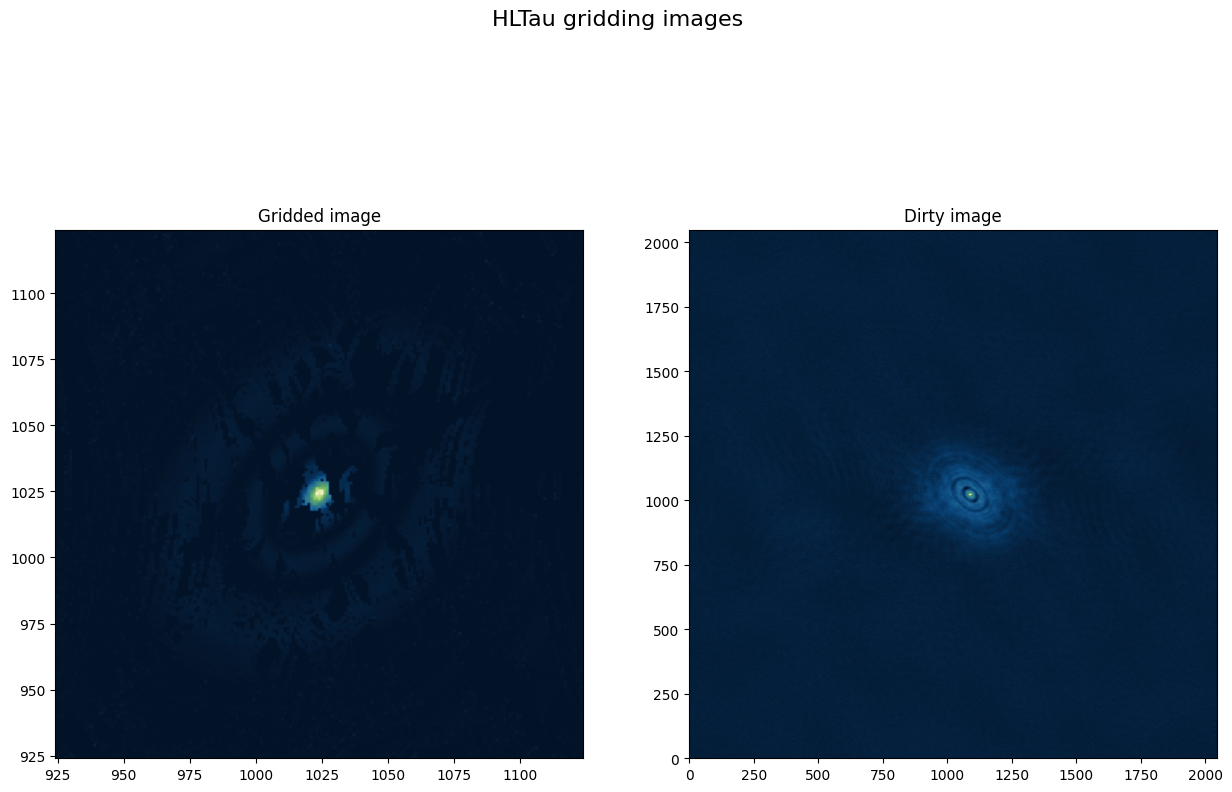

In [44]:
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

image = np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(gridded)))
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
ax[0].imshow(np.abs(gridded), cmap=cmc.navia)
ax[1].imshow(image.real,origin ="lower", cmap=cmc.navia)

ax[0].set(xlim=(N//2 - 100, N//2 + 100), ylim=(N//2 - 100, N//2 + 100)) # zoom
fig.suptitle('HLTau gridding images', fontsize=16)
ax[0].set_title("Gridded image")
ax[1].set_title("Dirty image")
figName = "hlTau.png"

In [ ]:
display(spark.sql('SELECT * FROM test_query').show())

Notar que es posible realizar tanto el gridding y la normalización en un solo bloque, de **writeStream** pero no se vería de manera ordenada, como se ve a continuación, es interesante notar que la solución propuesta permite realizar cálculos/expresiones complejas en poco espacio y en *streaming*

In [ ]:
ql.selectExpr(
    "FLOAT(SPLIT_PART(value, ';', 1)) AS u",
    "FLOAT(SPLIT_PART(value, ';', 2)) AS v",
    "FLOAT(SPLIT_PART(value, ';', 3)) AS vr",
    "FLOAT(SPLIT_PART(value, ';', 4)) AS vi",
    "FLOAT(SPLIT_PART(value, ';', 5)) AS w",
    "FLOAT(SPLIT_PART(value, ';', 6)) AS fq",
    "ROUND(u * (fq / 299792458) / 33571.773438) + (2048 / 2) AS ik",
    "ROUND(v * (fq / 299792458) / 33571.773438) + (2048 / 2) AS jk",
    "FLOAT(vr) * FLOAT(w) AS r",
    "FLOAT(vi) * FLOAT(w) AS i",
    "INT(ik * 2048 + jk) AS GRID",
    "current_timestamp() AS timestamp") \
    .withWatermark("timestamp", "0 minutes") \
    .groupBy("GRID", "timestamp").agg(
    sum("r").alias("sum_r"),
    sum("i").alias("sum_i"),
    sum("w").alias("sum_w"))\
    .selectExpr("GRID","FLOAT(sum_r / sum_w) AS sum_r", "FLOAT(sum_i / sum_w) AS sum_i")\
    .writeStream\
    .format("parquet")\
    .outputMode("append")\
    .option("path", "path/to/destination/dir")\
    .option("checkpointLocation", "/path/to/checkpoint/dir")\
    .start()\
    .awaitTermination()

In [ ]:
query.stop()

In [ ]:
query.lastProgress

In [ ]:
spark.streams.active

In [ ]:
query.stop()

In [ ]:
spark.streams.active